In [1]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (186 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [2]:
!pip install pyproj==1.9.6
!pip install netCDF4

     |████████████████████████████████| 2.8MB 5.7MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702133 sha256=1467c98c54557980885e384bf1857bdc4cc00efcadfed2138d0bf21a2616a03b
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 3.0.0.post1
    Uninstalling pyproj-3.0.0.post1:
      Successfully uninstalled pyproj-3.0.0.post1
     |████████████████████████████████| 4.3MB 5.5MB/s 
     |████████████████████████████████| 296kB 34.7MB/s 


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
from netCDF4 import Dataset
import numpy as np

In [4]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split as split
from sklearn.ensemble import RandomForestRegressor as RF
import pandas as pd
import seaborn as sns

In [5]:
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)

Question 1.

I have used the package Basemap which is an extension of matplotlib and i find easier in working with the same style and syntax of matplotlib.Further the package also supports using and plotting netCDF4 data types.

In [85]:
sea_temp = '/content/drive/MyDrive/Complex_systems_exam/woa18_decav_t00mn01.csv'
temp_annual = pd.read_csv(sea_temp, skipinitialspace=True)

nc_file = '/content/drive/MyDrive/Complex_systems_exam/aau6253_Data_file_S1.nc'
fh = Dataset(nc_file, mode='r')

rf = '/content/drive/MyDrive/Complex_systems_exam/RF_phyto.csv'
phyto = pd.read_csv(rf)

In [86]:
temp_annual_na = temp_annual.dropna()
lons = np.array([temp_annual_na['LATITUDE']])

lats = np.array([temp_annual_na['LONGITUDE']])

sst = np.array(temp_annual_na['0'])



temp_annual_na = temp_annual.dropna()
f = temp_annual_na[["LATITUDE", "LONGITUDE", "0"]]





In [87]:
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lon)

MaskError: ignored

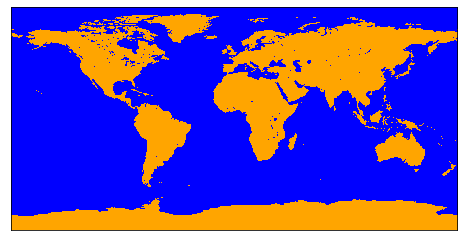

In [88]:
# Plot Data
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m.drawlsmask(land_color='orange',ocean_color='blue')
m.contour(xi, yi, sst)

#for index , row in f.iterrows():
  #m.plot(row.LONGITUDE,row.LATITUDE,markerfacecolor='red',markeredgecolor='white',marker='o',markersize=row['0']/10)
# Add Grid Lines
#m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
#m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)



# Add Title
plt.title('Global Sea surface temperature')

plt.show()

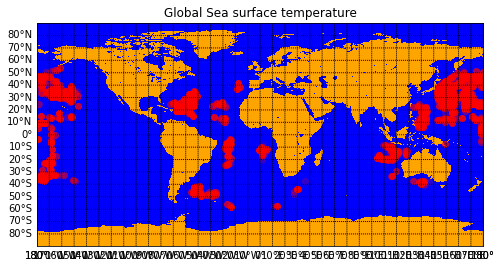

In [91]:
# Plot Data
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m.drawlsmask(land_color='orange',ocean_color='blue')
#m.contour(xi, yi, sst)

for index , row in f.iterrows():
  m.plot(row.LONGITUDE,row.LATITUDE,markerfacecolor='red',markeredgecolor='red',marker='o',alpha=row['0'])
#Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)



# Add Title
plt.title('Global Sea surface temperature')

plt.show()

In [92]:
df = phyto[['SST','SizeDivQindx']]
df = resample(df, n_samples=100, replace=True, stratify=df,random_state=0)
Size_x = df[['SST']]
Size_y = df[['SizeDivQindx']]
train_Size_x,test_Size_x,train_Size_y,test_Size_y=split(Size_x,Size_y,test_size=0.25,random_state=0)


In [93]:
rfSDQ = RF(n_estimators =500,  oob_score=True , random_state =0)

In [94]:
rfSDQ.fit(train_Size_x , np.ravel(train_Size_y))
y_pred = rfSDQ.predict(test_Size_x)

In [95]:
from sklearn.metrics import r2_score
r2_score(test_Size_y, y_pred)

0.9234744640059724

In [96]:
temp = temp_annual[['0']].fillna(999)

In [97]:
prediction = rfSDQ.predict(temp)


In [98]:
temp_2 = temp_annual[['LATITUDE','LONGITUDE']]

In [99]:
temp_2['predicted'] = prediction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
temp_3 = temp_2.groupby('LATITUDE').mean()

In [101]:
temp_3

,LONGITUDE,predicted
LATITUDE,,
-77.5,-116.596774,2.214640
-76.5,-43.976190,2.110641
-75.5,-48.045455,2.044460
-74.5,-62.659091,2.084346
-73.5,-83.725490,2.086171
...,...,...
85.5,5.810030,1.577370
86.5,7.533233,1.492146
87.5,2.387500,1.518497


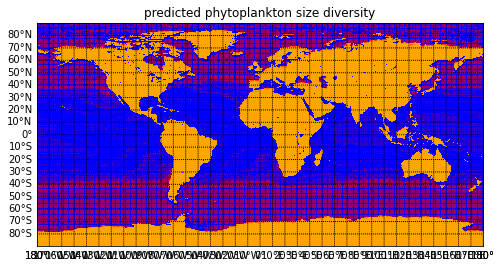

In [102]:
# Plot Data
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m.drawlsmask(land_color='orange',ocean_color='blue')

for index , row in temp_2.iterrows():
  m.plot(row.LONGITUDE,row.LATITUDE,markerfacecolor='red',markeredgecolor='red',marker='o',markersize=row['predicted']/10)
# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)



# Add Title
plt.title('predicted phytoplankton size diversity')

plt.show()

In [103]:
lons = fh.variables['longitude'][:]
lats = fh.variables['latitude'][:]
spp_richy = fh.variables['spp_rich'][:].mean(axis=0)
_units = fh.variables['spp_rich'].unit

In [104]:
fh.close()

In [105]:
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

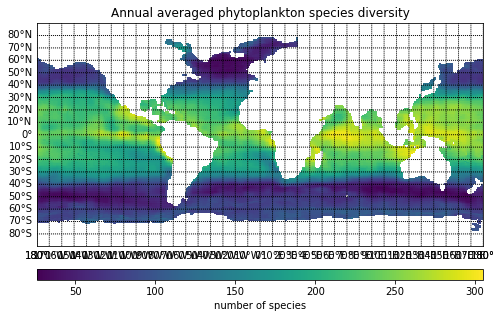

In [106]:
# Plot Data
fig = plt.figure(figsize=(8, 6), edgecolor='w')
cs = m.pcolor(xi,yi,np.squeeze(spp_richy))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(_units)

# Add Title
plt.title('Annual averaged phytoplankton species diversity')

plt.show()

In [107]:
import xarray as xr

ds = xr.open_dataset(nc_file)
df = ds.to_dataframe()

In [111]:
df

spp_rich
latitude longitude z           
 89.5    -179.5    1        NaN
                   2        NaN
                   3        NaN
                   4        NaN
                   5        NaN
...                         ...
-89.5     179.5    8        NaN
                   9        NaN
                   10       NaN
                   11       NaN
                   12       NaN

[777600 rows x 1 columns]

In [112]:
sp_df = df.groupby('latitude').mean()

In [113]:
sp_df

,spp_rich
latitude,
-89.5,NaN
-88.5,NaN
-87.5,NaN
-86.5,NaN
-85.5,NaN
...,...
85.5,NaN
86.5,NaN
87.5,NaN


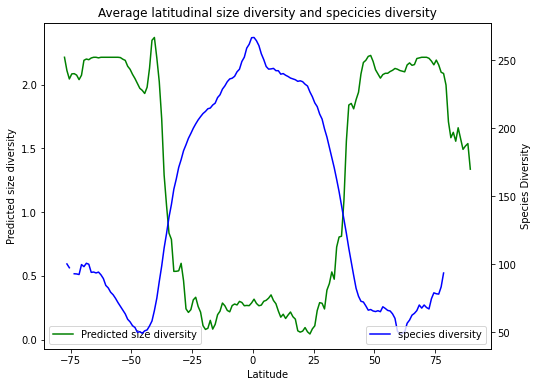

In [119]:
fig1=plt.figure(figsize=(8, 6), edgecolor='w')

ax1=plt.subplot(1,1,1)

ax1.plot(temp_3.index,temp_3['predicted'],c='g',label='Predicted size diversity')
ax1.set_ylabel('Predicted size diversity')
ax1.set_xlabel('Latitude')
ax1.legend(loc='lower left')
ax1_2=ax1.twinx()
ax1_2.plot(sp_df.index,sp_df['spp_rich'],c='b',label='species diversity')
ax1_2.set_ylabel('Species Diversity')
ax1_2.legend(loc='lower right')
# Add Title
plt.title('Average latitudinal size diversity and specicies diversity')

plt.show()

In [ ]:
37 degrees north or south

inverse of each other latitudes with higher species diversity have lower size diversity and vice versa

other envirenmental factors can be amount of unlight in the sea sunlight and even wind patterns